# mtbb201_parallelHistoFill
Parallel fill of a histogram.
This tutorial shows how a histogram can be filled in parallel
with a multiprocess approach.




**Author:** Danilo Piparo.  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:16 AM.</small></i>

In [1]:
const UInt_t poolSize = 4U;

In [2]:
TH1::AddDirectory(false);
ROOT::TThreadExecutor pool(poolSize);
auto fillRandomHisto = [](int seed = 0) {
   TRandom3 rndm(seed);
   auto h = new TH1F("myHist", "Filled in parallel", 128, -8, 8);
   for (auto i : ROOT::TSeqI(1000000)) {
      h->Fill(rndm.Gaus(0, 1));
   }
   return h;
};

auto seeds = ROOT::TSeqI(23);
ROOT::ExecutorUtils::ReduceObjects<TH1F *> redfunc;
auto sumRandomHisto = pool.MapReduce(fillRandomHisto, seeds, redfunc);

auto c = new TCanvas();
sumRandomHisto->Draw();
return 0;

Draw all canvases 

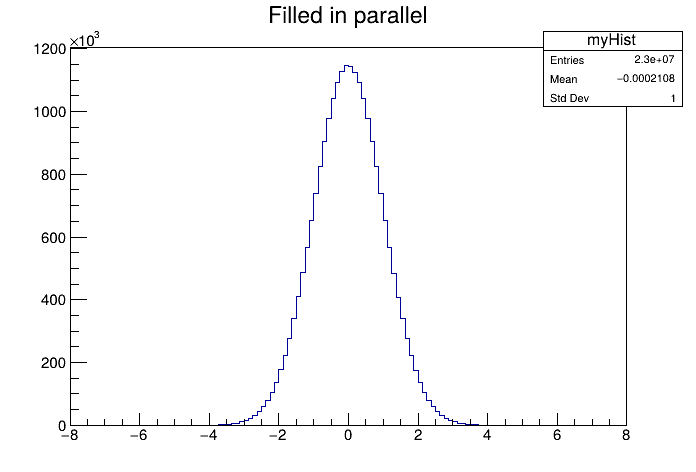

In [3]:
gROOT->GetListOfCanvases()->Draw()